##**1) Import Library**

In [2]:
# Upgrade Matplotlib
!pip install matplotlib==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 16.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [1]:
# Install Category Encoder
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 935 kB/s 


In [2]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Statistics Model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Feature Engineering
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from category_encoders import TargetEncoder
from sklearn.preprocessing import OrdinalEncoder

# Pipelining & Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek

# ML Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_validate, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score

##**2) Load Dataset**

In [3]:
# load dataset (.csv,.xlsx)
df = pd.read_csv("/content/drive/MyDrive/7.Virtual Internship/Home Credit/dataset/application_train.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172,0.9782,0.7125,0.0172,0.0806,0.0345,0.4583,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.2040,0.0887,0.9876,0.8323,0.0203,0.22,0.1034,0.6042,0.2708,0.0605,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451,0.9727,0.6406,0.0022,0.0000,0.1034,0.0833,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0250,0.0435,0.9727,0.6310,0.0022,0.00,0.1034,0.0833,0.1250,0.0589,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.0000,0.1050,0.0894,0.9816,0.7583,0.0124,0.0000,0.2069,0.1667,0.2

##**3) Data Preprocessing**

###**- Data Cleaning**

In [5]:
# check total rows and columns
df.shape

(307511, 122)

In [6]:
# check info feature and target
cols_item = []
for col in df.columns :
    cols_item.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique()]);

df_info = pd.DataFrame(columns=['features', 'data_type', 'missing_value', 'missing_value_Pct', 'unique_value'],
                     data=cols_item)
df_info

,features,data_type,missing_value,missing_value_Pct,unique_value
0,SK_ID_CURR,int64,0,0.00,307511
1,TARGET,int64,0,0.00,2
2,NAME_CONTRACT_TYPE,object,0,0.00,2
3,CODE_GENDER,object,0,0.00,3
4,FLAG_OWN_CAR,object,0,0.00,2
5,FLAG_OWN_REALTY,object,0,0.00,2
6,CNT_CHILDREN,int64,0,0.00,15
7,AMT_INCOME_TOTAL,float64,0,0.00,2548
8,AMT_CREDIT,float64,0,0.00,5603
9,AMT_ANNUITY,float64,12,0.00,13672


---

> **Observasi**:
>
> - kolom yang terdapat missing value > **50%** akan didrop, diantaranya:
``` 
'OWN_CAR_AGE','EXT_SOURCE_1','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI,'YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE'
```
> - Kolom yang terdiri atas: 1) kurang/tidak jelas informasinya, 2) tidak terlalu diperlukan untuk analisa, 3) membutuhkan perlakuan/penilaian tertentu untuk mendapatkan informasinya, akan didrop, diantaranya:
```
'SK_ID_CURR','EXT_SOURCE_2','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE','DAYS_LAST_PHONE_CHANGE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE''FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4,'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13,'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
```
> - Kolom yang akan diimputasi dengan median, diantaranya:
```
'CNT_FAM_MEMBERS','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'	
```
> - Kolom yang akan diimputasi dengan mode, diantaranya:
```
'NAME_TYPE_SUITE'
```
> - Kolom yang terdapat value yang kurang relevan(contoh: XNA/NaN, Unknown, dll.) akan direplace dengan value lain yang relevan, diantaranya:
```
'CODE_GENDER','NAME_FAMILY_STATUS','NAME_TYPE_SUITE','ORGANIZATION_TYPE','OCCUPATION_TYPE'
```
> - Kolom yang terdapat datanya/valuenya negatif perlu di absolutkan agar menjadi positif, diantaranya:
```
'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'
``` 
> - Kolom berikut ini akan diubah nilai/valuenya dari hari ke tahun agar memudahkan proses analisa:
```
'DAYS_BIRTH','DAYS_EMPLOYED'
```
> - Kolom berkut ini memiliki karakteristik yang sama (hanya berbeda pada keterangan waktu), maka perlu dipilih/diwaliki satu saja:
```
'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'	
```

---

In [7]:
# check the columns with missing value > threshold
df_null = df.isna().sum()/len(df)*100
feature= df.columns
features = []
for i in range(df.columns.shape[0]):
    if df_null[i]>=50: #setting the threshold as 50%
       features.append(feature[i]) 

In [8]:
features

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [9]:
# groups the columns with less information or not really needed for analysis
drop_cols= ['SK_ID_CURR','EXT_SOURCE_2','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG',
            'FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE',
            'YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE',
            'EMERGENCYSTATE_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
            'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE',
            'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
            'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
            'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
            'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
            'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
            'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
            'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT']

# groups the columns to fill NaN values with the median
fill_median= ['CNT_FAM_MEMBERS','AMT_GOODS_PRICE','AMT_ANNUITY',
              'AMT_REQ_CREDIT_BUREAU_YEAR']

# groups the columns to fill NaN values with the mode
fill_mode= ['NAME_TYPE_SUITE']

# groups the column whose value is to be converted to positive
abs_cols= ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'] 


In [10]:
# drop columns with missing value > threshold 
df = df.drop(columns= features, axis=1)

# drop the columns with less information or not really needed for analysis
df = df.drop(columns= drop_cols, axis=1)

# fill NaN/Null values in column with median
df[fill_median] = df[fill_median].fillna(df[fill_median].median())

# fill NaN/Null values in column with mode
df[fill_mode] = df[fill_mode].fillna(df.mode().iloc[0])

# replace data type from float to integer
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].astype(int)
df['DAYS_REGISTRATION']= df['DAYS_REGISTRATION'].astype(int)

# replace irrelevant value in column with relevant value
df['CODE_GENDER'] = df['CODE_GENDER'].replace('XNA',df['CODE_GENDER'].mode()[0])
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].replace('XNA','Other')
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Other')
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].replace(['Other_A','Other_B'],'Other')
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].replace('Unknown', df['NAME_FAMILY_STATUS'].mode()[0]) 

# absolute value in the column that is negative to be positive
df[abs_cols] = df[abs_cols].abs()

# rename the columns with relevant 
df = df.rename(columns = {'DAYS_BIRTH':'AGE_IN_YEARS', 'DAYS_EMPLOYED':'TENURE_IN_YEARS',
                          'DAYS_REGISTRATION':'CHANGE_REGISTRATION_IN_YEARS','DAYS_ID_PUBLISH':'CHANGE_ID_PUBLISH_IN_YEARS'})

# replace the order of columns in the dataset
df = df[['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
         'NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
         'NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','WEEKDAY_APPR_PROCESS_START',
         'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
         'AGE_IN_YEARS','TENURE_IN_YEARS','CHANGE_REGISTRATION_IN_YEARS','CHANGE_ID_PUBLISH_IN_YEARS',
         'AMT_REQ_CREDIT_BUREAU_YEAR','CNT_CHILDREN','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START',
         'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE',
         'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
         'REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_REGION_NOT_WORK_REGION',
         'LIVE_CITY_NOT_WORK_CITY','TARGET']]

In [11]:
# create function to convert number of days to years
def days_to_years(df, column):
    for col in column:
        df[col] = round(df[col].apply(lambda x: x / 365.25),1)


In [12]:
# convert the number of days in the column to the number of years
days_to_years(df,['AGE_IN_YEARS','TENURE_IN_YEARS',
                  'CHANGE_REGISTRATION_IN_YEARS','CHANGE_ID_PUBLISH_IN_YEARS'])

In [13]:
# check again the dataframe
df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,WEEKDAY_APPR_PROCESS_START,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE_IN_YEARS,TENURE_IN_YEARS,CHANGE_REGISTRATION_IN_YEARS,CHANGE_ID_PUBLISH_IN_YEARS,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVE_CITY_NOT_WORK_CITY,TARGET
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,WEDNESDAY,202500.0,406597.5,24700.5,351000.0,0.018801,25.9,1.7,10.0,5.8,1.0,0,1,10,1,1,0,1,1,0,2,2,0,0,0,0,0,0,1
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,School,MONDAY,270000.0,1293502.5,35698.5,1129500.0,0.003541,45.9,3.3,3.2,0.8,0.0,0,2,11,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,MONDAY,67500.0,135000.0,6750.0,135000.0,0.010032,52.1,0.6,11.7,6.9,0.0,0,1,9,1,1,1,1,1,0,2,2,0,0,0,0,0,0,0
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3,WEDNESDAY,135000.0,312682.5,29686.5,297000.0,0.008019,52.0,8.3,26.9,6.7,1.0,0,2,17,1,1,0,1,0,0,2,2,0,0,0,0,0,0,0
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion,THURSDAY,121500.0,513000.0,21865.5,513000.0,0.028663,54.6,8.3,11.8,9.5,0.0,0,1,11,1,1,0,1,0,0,2,2,0,0,0,1,0,1,0


##**4) Exploratory Data Analysis (EDA)**

In [14]:
# copy previous dataset for EDA
df_eda= df.copy()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
df_eda.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,WEEKDAY_APPR_PROCESS_START,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE_IN_YEARS,TENURE_IN_YEARS,CHANGE_REGISTRATION_IN_YEARS,CHANGE_ID_PUBLISH_IN_YEARS,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVE_CITY_NOT_WORK_CITY,TARGET
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,WEDNESDAY,202500.0,406597.5,24700.5,351000.0,0.018801,25.9,1.7,10.0,5.8,1.0,0,1,10,1,1,0,1,1,0,2,2,0,0,0,0,0,0,1
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,School,MONDAY,270000.0,1293502.5,35698.5,1129500.0,0.003541,45.9,3.3,3.2,0.8,0.0,0,2,11,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,MONDAY,67500.0,135000.0,6750.0,135000.0,0.010032,52.1,0.6,11.7,6.9,0.0,0,1,9,1,1,1,1,1,0,2,2,0,0,0,0,0,0,0
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3,WEDNESDAY,135000.0,312682.5,29686.5,297000.0,0.008019,52.0,8.3,26.9,6.7,1.0,0,2,17,1,1,0,1,0,0,2,2,0,0,0,0,0,0,0
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion,THURSDAY,121500.0,513000.0,21865.5,513000.0,0.028663,54.6,8.3,11.8,9.5,0.0,0,1,11,1,1,0,1,0,0,2,2,0,0,0,1,0,1,0


In [15]:
# group the feature into each data type
categorical_feature = [col for col in df_eda.columns if df_eda[col].dtype=='O']
continuous_feature = [col for col in df.columns if df_eda[col].dtype== np.float64]
discrete_feature = [col for col in df.columns if df_eda[col].dtype== np.int64]

In [16]:
categorical_feature

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START']

In [17]:
continuous_feature

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'AGE_IN_YEARS',
 'TENURE_IN_YEARS',
 'CHANGE_REGISTRATION_IN_YEARS',
 'CHANGE_ID_PUBLISH_IN_YEARS',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [18]:
discrete_feature

['CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY',
 'TARGET']

###**Statistical Summary**

In [19]:
df_eda[categorical_feature].describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,2,F,202452
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,307511,6,Unaccompanied,249818
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,5,Married,196434
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,307511,19,Other,96391


In [20]:
df_eda[continuous_feature].describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.00000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.00000,808650.000000,4.050000e+06
AMT_ANNUITY,307511.0,27108.487841,14493.461065,1615.50000,16524.000000,24903.00000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307511.0,538316.294367,369288.982246,40500.00000,238500.000000,450000.00000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,0.00029,0.010006,0.01885,0.028663,7.250800e-02
AGE_IN_YEARS,307511.0,43.906968,11.947987,20.50000,34.000000,43.10000,53.900000,6.910000e+01
TENURE_IN_YEARS,307511.0,185.423643,381.783572,0.00000,2.600000,6.10000,15.600000,1.000000e+03
CHANGE_REGISTRATION_IN_YEARS,307511.0,13.651133,9.645235,0.00000,5.500000,12.30000,20.500000,6.750000e+01
CHANGE_ID_PUBLISH_IN_YEARS,307511.0,8.197628,4.132834,0.00000,4.700000,8.90000,11.800000,1.970000e+01
AMT_REQ_CREDIT_BUREAU_YEAR,307511.0,1.778463,1.765523,0.00000,1.000000,1.00000,3.000000,2.500000e+01


In [21]:
df_eda[discrete_feature].describe().T

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
CNT_FAM_MEMBERS,307511.0,2.152664,0.910679,1.0,2.0,2.0,3.0,20.0
HOUR_APPR_PROCESS_START,307511.0,12.063419,3.265832,0.0,10.0,12.0,14.0,23.0
FLAG_MOBIL,307511.0,0.999997,0.001803,0.0,1.0,1.0,1.0,1.0
FLAG_EMP_PHONE,307511.0,0.819889,0.384280,0.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,307511.0,0.199368,0.399526,0.0,0.0,0.0,0.0,1.0
FLAG_CONT_MOBILE,307511.0,0.998133,0.043164,0.0,1.0,1.0,1.0,1.0
FLAG_PHONE,307511.0,0.281066,0.449521,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,307511.0,0.056720,0.231307,0.0,0.0,0.0,0.0,1.0
REGION_RATING_CLIENT,307511.0,2.052463,0.509034,1.0,2.0,2.0,2.0,3.0


###**Univariate Analysis**



####**- Target/Label Column**

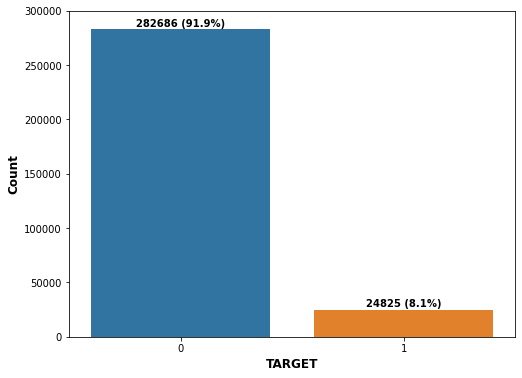

In [22]:
plt.figure(figsize=(8,6))
ax= sns.countplot(data=df_eda, x='TARGET')

for bars in ax.containers:
    labels = [f'{v.get_height()} ({v.get_height()/df_eda.TARGET.count()*100:.1f}%)' for v in bars]
    ax.bar_label(bars, label_type= 'edge', labels= labels, weight='bold', padding=1)

ax.set_ylim(0,300000)
ax.set_xlabel('TARGET', weight='bold', fontsize=12)
ax.set_ylabel('Count', weight='bold', fontsize=12)

plt.show()

> **Observasi:**
> - 0 = Klien **tidak** mengalami **kesulitan membayar** pinjaman, 1 = Klien **mengalami kesulitan membayar pinjaman**.
> - Terdapat **24825** klien atau sebesar **8.1%** yang mengalami **kesulitan pembayaran pinjaman** (memiliki keterlambatan pembayaran berdasarkan jatuh tempo/hari yang telah ditentukan setidaknya satu pinjaman dari pinjaman yang diajukan).
> - Sedangkan sisanya terdapat **282686** klien atau sebesar **91.9%** yang **tidak mengalami kesulitan pembayaran pinjaman**.
> - Dapat diartikan bahwa **lebih banyak** jumlah klien yang **tidak kesulitan membayar pinjaman/lancar** dalam membayar kredit. sedangkan klien yang **kesulitan membayar kredit** jumlahnya **lebih sedikit** 
> - Perbandingannya sekitar **±90:10** (data imbalance)



####**- Categorical Column**

In [23]:
cat1=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']

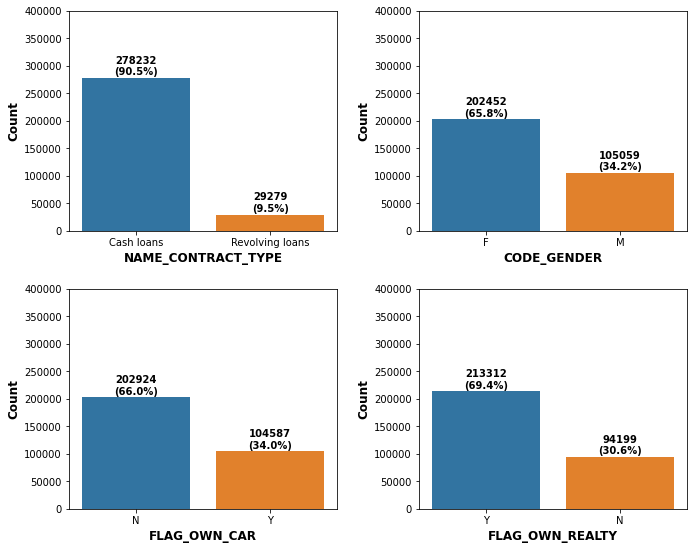

In [24]:
plt.figure(figsize=(10,8))
for i, col in enumerate(cat1):
    plt.subplot(2,2,i+1)
    ax= sns.countplot(x= df_eda[cat1[i]], order=df_eda[cat1[i]].value_counts().index)
    for bars in ax.containers:
        labels = [f'{v.get_height()}\n({v.get_height()/df_eda[cat1[i]].count()*100:.1f}%)' for v in bars]
        ax.bar_label(bars, label_type= 'edge', labels= labels, weight='bold', padding=1)
    ax.set_xlabel(cat1[i], weight='bold', fontsize=12)
    ax.set_ylabel('Count', weight='bold', fontsize=12)
    ax.set_ylim(0,400000)
    plt.tight_layout(pad=2)

In [25]:
cat2 = ['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
        'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START']

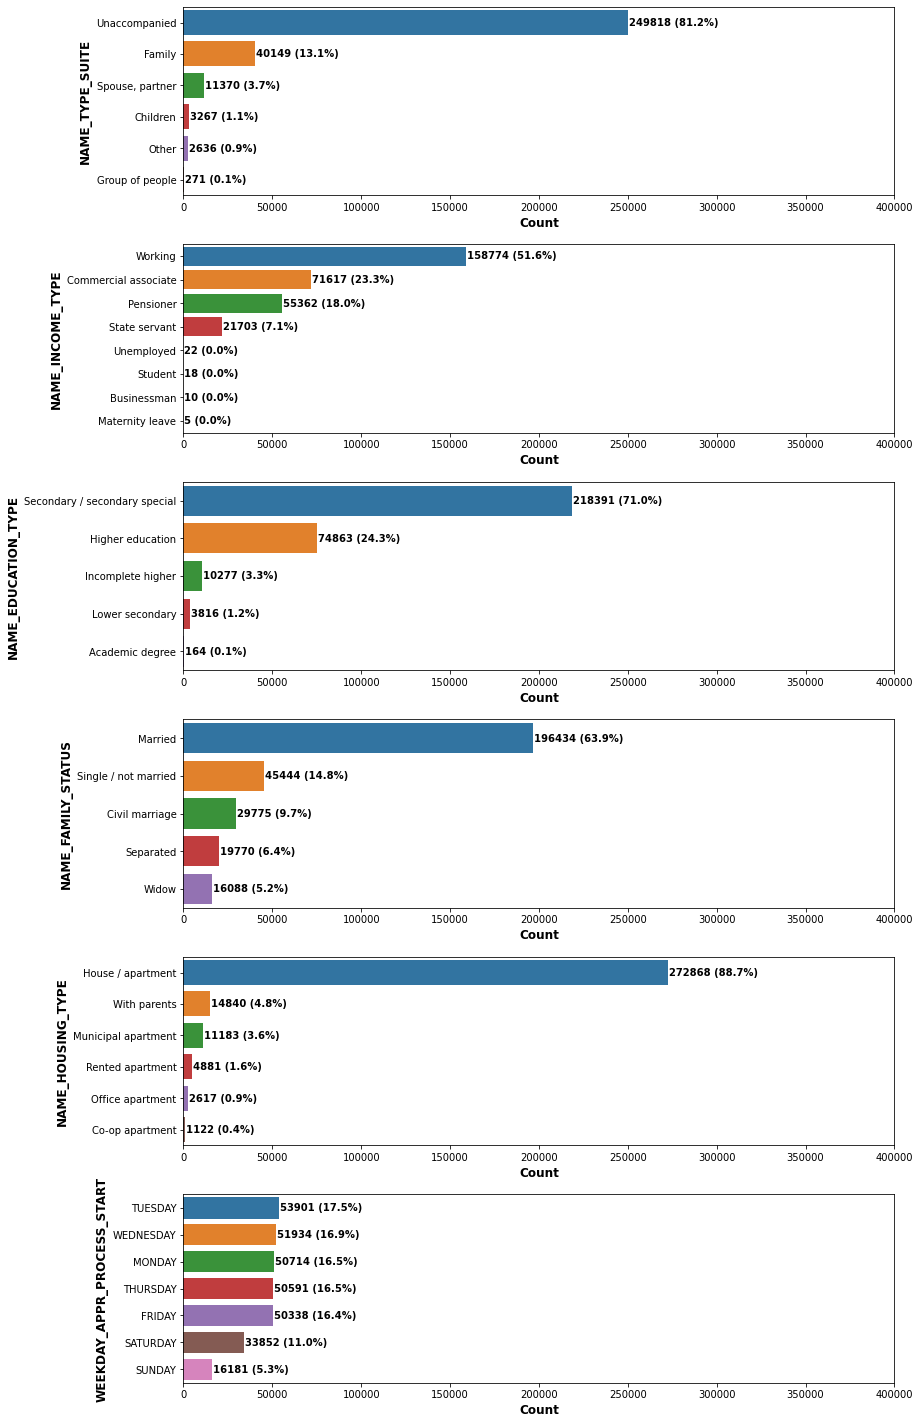

In [26]:
plt.figure(figsize=(13,20))
for i, col in enumerate(cat2):
    plt.subplot(6,1,i+1)
    ax= sns.countplot(y= df_eda[cat2[i]], order= df_eda[cat2[i]].value_counts().index)
    for bars in ax.containers:
        labels = [f'{v.get_width()} ({v.get_width()/df_eda[cat2[i]].count()*100:.1f}%)' for v in bars]
        ax.bar_label(bars, label_type= 'edge', labels= labels, weight='bold', padding=1)
    ax.set_ylabel(cat2[i], weight='bold', fontsize=12)
    ax.set_xlabel('Count', weight='bold', fontsize=12)
    ax.set_xlim(0,400000)
    plt.tight_layout(pad=1.5)

In [27]:
cat3 = ['OCCUPATION_TYPE','ORGANIZATION_TYPE']

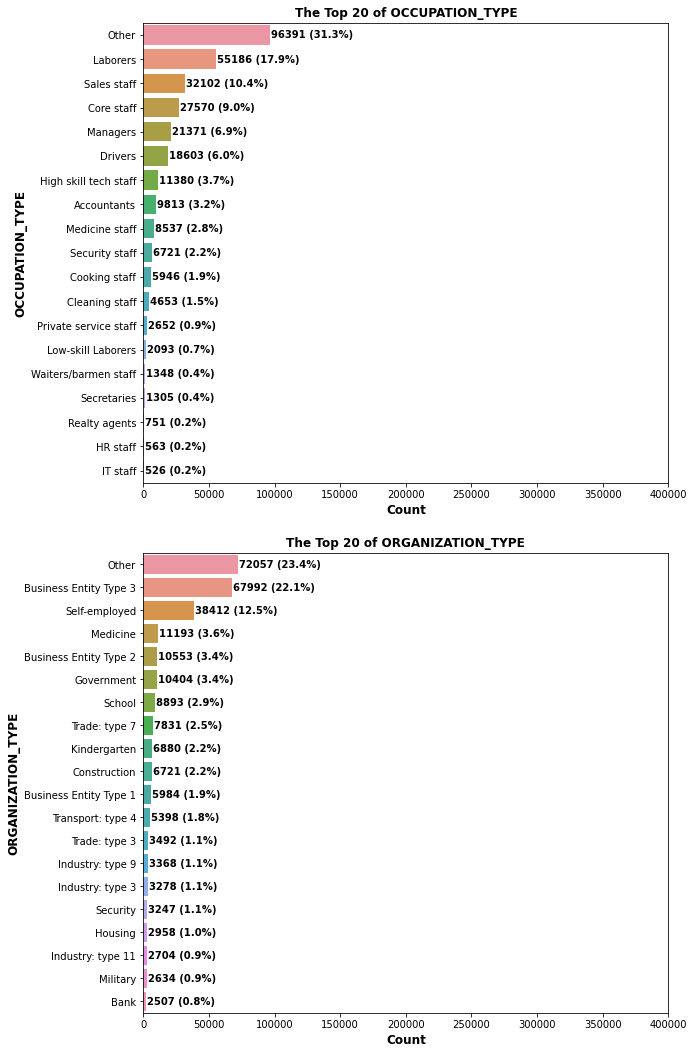

In [28]:
plt.figure(figsize=(10,15))
for i, col in enumerate(cat3):
    plt.subplot(2,1,i+1)
    ax= sns.countplot(y= df_eda[cat3[i]], order= df_eda[cat3[i]].value_counts().head(20).index)
    for bars in ax.containers:
        labels = [f'{v.get_width()} ({v.get_width()/df_eda[cat3[i]].count()*100:.1f}%)' for v in bars]
        ax.bar_label(bars, label_type= 'edge', labels= labels, weight='bold', padding=1)
    ax.set_title(f'The Top 20 of {cat3[i]}', weight='bold', fontsize=12)
    ax.set_ylabel(cat3[i], weight='bold', fontsize=12)
    ax.set_xlabel('Count', weight='bold', fontsize=12)
    ax.set_xlim(0,400000)
    plt.tight_layout(pad=2)

####**- Numerical Column (*Discrete*)**

In [29]:
cat_discrete= ['CNT_CHILDREN','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START']

In [30]:
binary_discrete= ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                  'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY',
                  'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
                  'REG_CITY_NOT_WORK_CITY','LIVE_REGION_NOT_WORK_REGION','LIVE_CITY_NOT_WORK_CITY',]

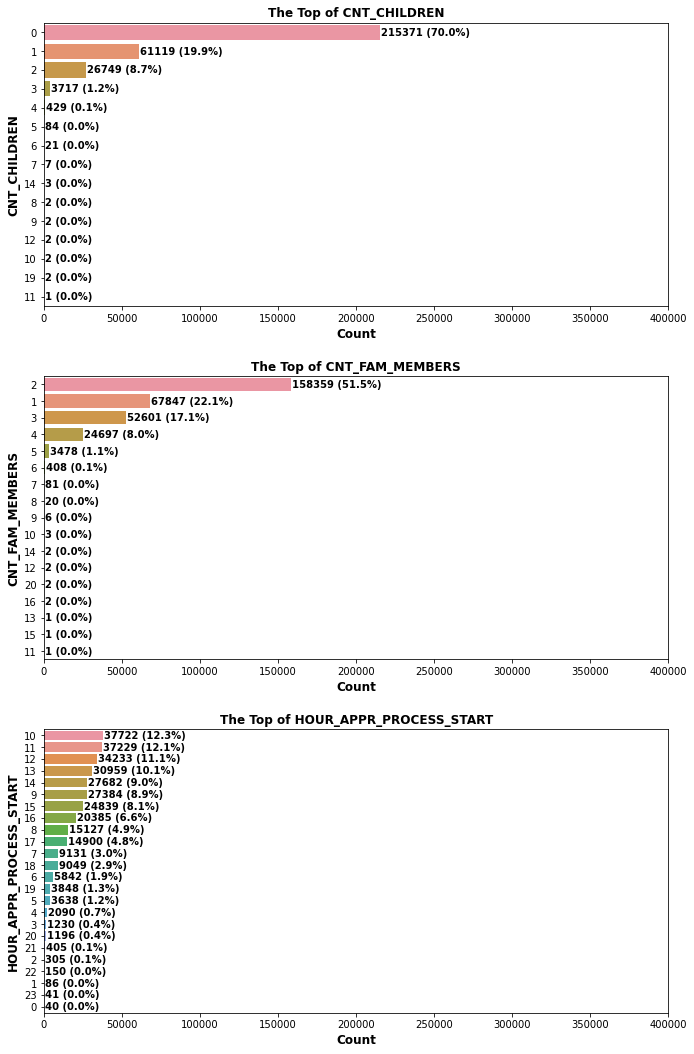

In [31]:
plt.figure(figsize=(10,15))
for i, col in enumerate(cat_discrete):
    plt.subplot(3,1,i+1)
    ax= sns.countplot(y= df_eda[cat_discrete[i]], order= df_eda[cat_discrete[i]].value_counts().index)
    for bars in ax.containers:
        labels = [f'{v.get_width()} ({v.get_width()/df_eda[cat_discrete[i]].count()*100:.1f}%)' for v in bars]
        ax.bar_label(bars, label_type= 'edge', labels= labels, weight='bold', padding=1)
    ax.set_title(f'The Top of {cat_discrete[i]}', weight='bold', fontsize=12)
    ax.set_ylabel(cat_discrete[i], weight='bold', fontsize=12)
    ax.set_xlabel('Count', weight='bold', fontsize=12)
    ax.set_xlim(0,400000)
    plt.tight_layout(pad=2)

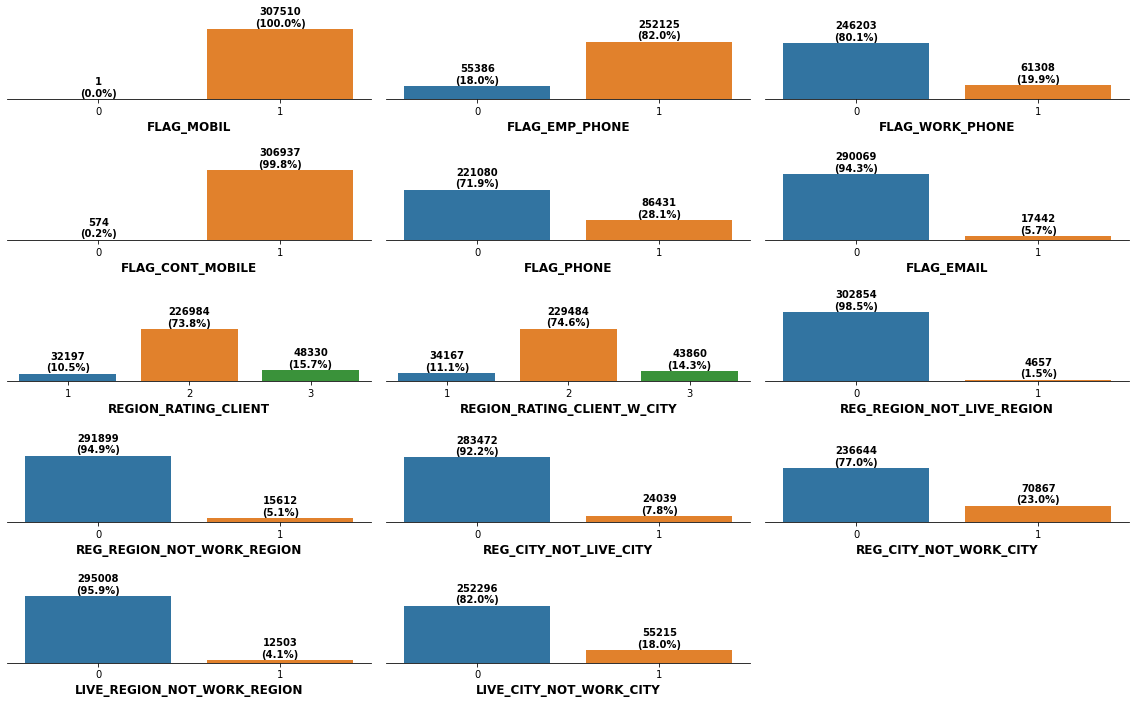

In [32]:
plt.figure(figsize=(16,10))
for i, col in enumerate(binary_discrete):
    plt.subplot(5,3,i+1)
    ax= sns.countplot(x= binary_discrete[i], data= df_eda)
    for bars in ax.containers:
        labels = [f'{v.get_height()}\n({v.get_height()/df_eda[binary_discrete[i]].count()*100:.1f}%)' for v in bars]
        ax.bar_label(bars, label_type= 'edge', labels= labels, weight='bold', padding=1)
    ax.spines[['top','left','right']].set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_yticklabels([])
    ax.set_xlabel(binary_discrete[i], weight='bold', fontsize=12)

    ax.set_ylim(0,400000)
    plt.tight_layout(1.5)

####**- Numerical Column (*Continuous*)**

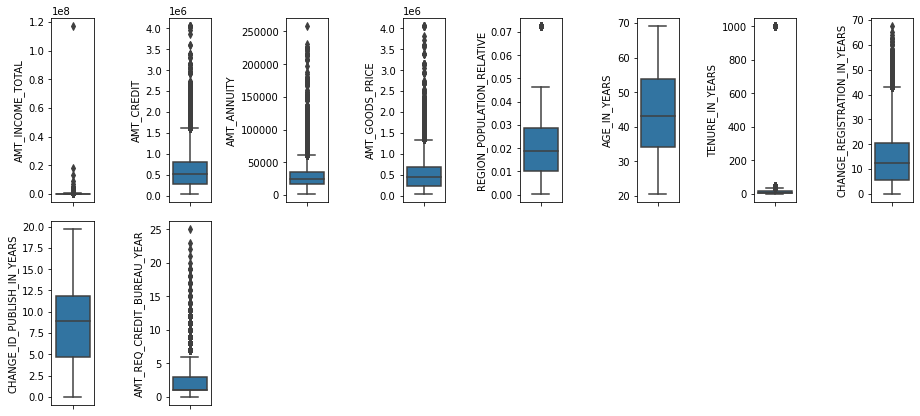

In [32]:
plt.figure(figsize=(13,6))
for i, col in enumerate(continuous_feature):
    plt.subplot(2,8,i+1)
    ax= sns.boxplot(y= continuous_feature[i], data= df_eda)
    plt.tight_layout(1.5)

> **Observasi:**
> - Terlihat dari boxplot bahwa hampir semua data kontinue (*Continuous*) memiliki outlier
> - Outlier pada `TENURE_IN_YEARS` tampak tidak wajar, karena ada yang bekerja sampai 1000 tahun. maka value ini akan didrop
> - Begitupula dengan `AMT_INCOME_TOTAL` juga terlihat tidak wajar outliernya, karena memiliki gaji 117.000.000 yang rangenya sangat jauh dari distribusi gaji lainnya. value yang sangat jauh ini akan didrop.




In [33]:
df_eda.drop(df_eda[df_eda['TENURE_IN_YEARS'] == 1000.0].index, inplace = True)

In [34]:
df_eda.drop(df_eda[df_eda['AMT_INCOME_TOTAL'] == 117000000.0].index, inplace = True)

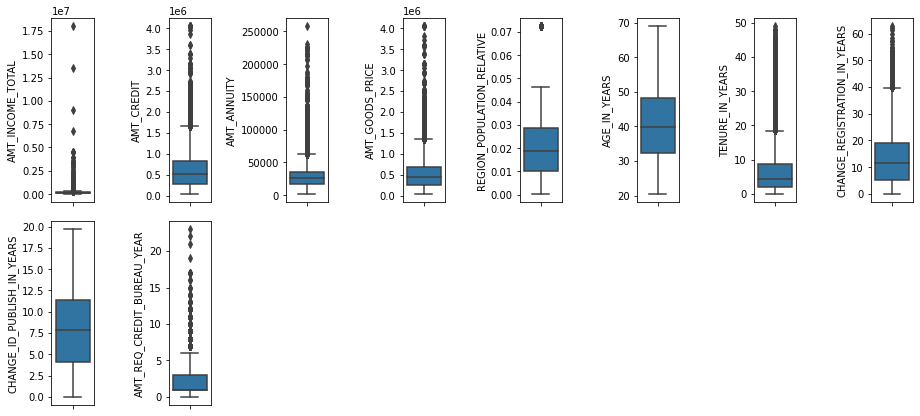

In [35]:
plt.figure(figsize=(13,6))
for i, col in enumerate(continuous_feature):
    plt.subplot(2,8,i+1)
    ax= sns.boxplot(y= continuous_feature[i], data= df_eda)
    plt.tight_layout(1.5)

###**Bivariate Analysis**

####**- Categorical Column**

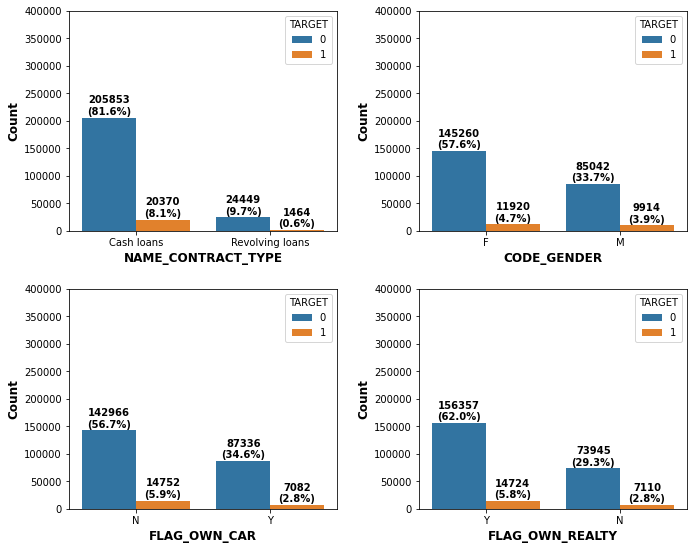

In [36]:
plt.figure(figsize=(10,8))
for i, col in enumerate(cat1):
    plt.subplot(2,2,i+1)
    ax= sns.countplot(x= df_eda[cat1[i]],hue=df_eda['TARGET'], order=df_eda[cat1[i]].value_counts().index)
    for bars in ax.containers:
        labels = [f'{v.get_height()}\n({v.get_height()/df_eda[cat1[i]].count()*100:.1f}%)' for v in bars]
        ax.bar_label(bars, label_type= 'edge', labels= labels, weight='bold', padding=1)
    ax.set_xlabel(cat1[i], weight='bold', fontsize=12)
    ax.set_ylabel('Count', weight='bold', fontsize=12)
    ax.set_ylim(0,400000)
    plt.tight_layout(pad=2)

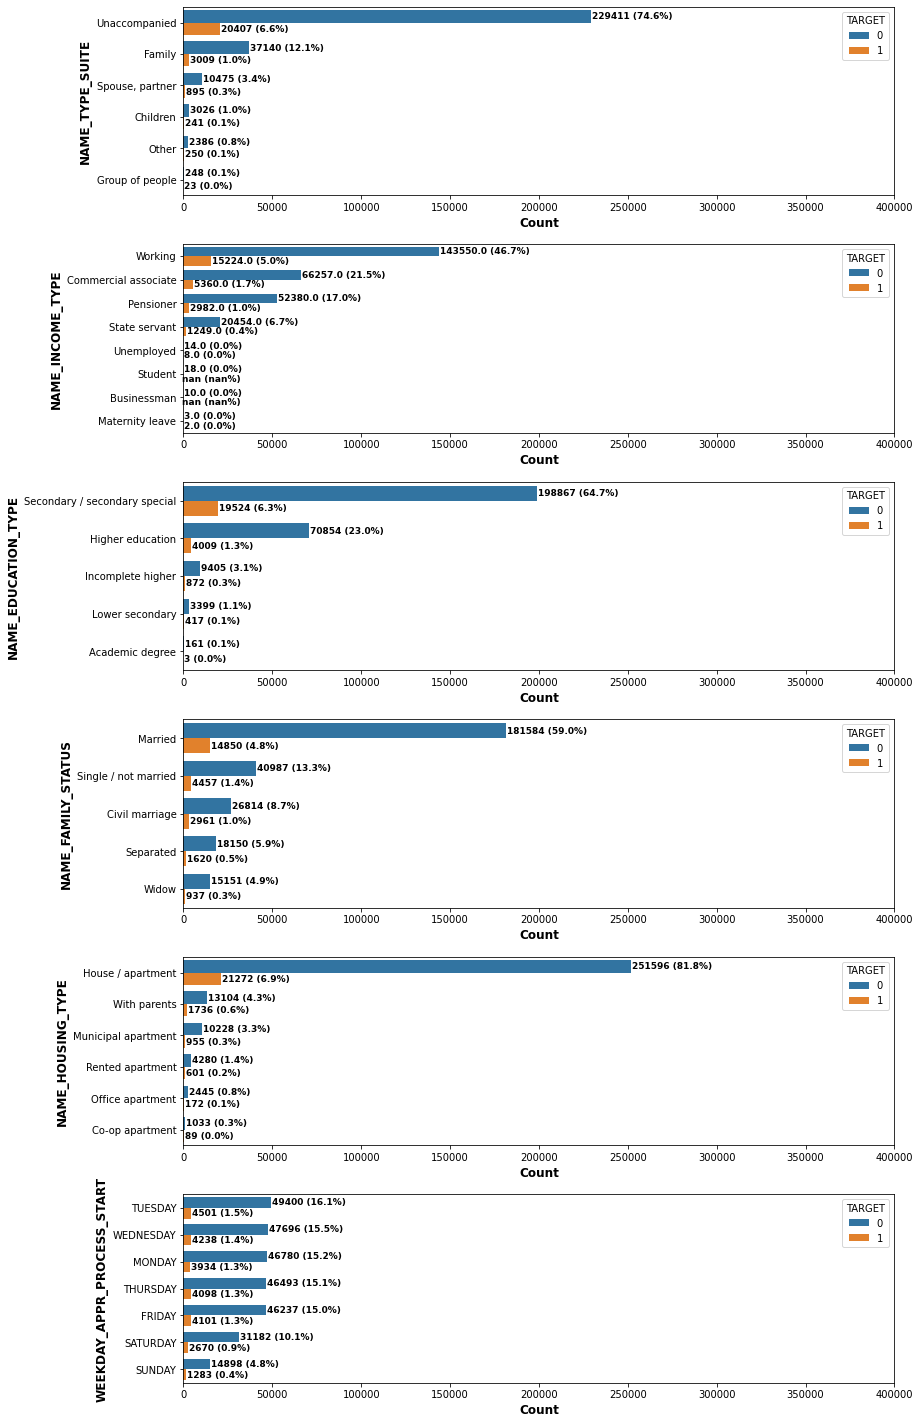

In [35]:
plt.figure(figsize=(13,20))
for i, col in enumerate(cat2):
    plt.subplot(6,1,i+1)
    ax= sns.countplot(y= df_eda[cat2[i]], hue= df_eda['TARGET'], order= df_eda[cat2[i]].value_counts().index)
    for bars in ax.containers:
        labels = [f'{v.get_width()} ({v.get_width()/df_eda[cat2[i]].count()*100:.1f}%)' for v in bars]
        ax.bar_label(bars, label_type= 'edge', labels= labels, weight='bold', padding=1, fontsize=9)
    ax.set_ylabel(cat2[i], weight='bold', fontsize=12)
    ax.set_xlabel('Count', weight='bold', fontsize=12)
    ax.set_xlim(0,400000)
    plt.tight_layout(pad=1.5)

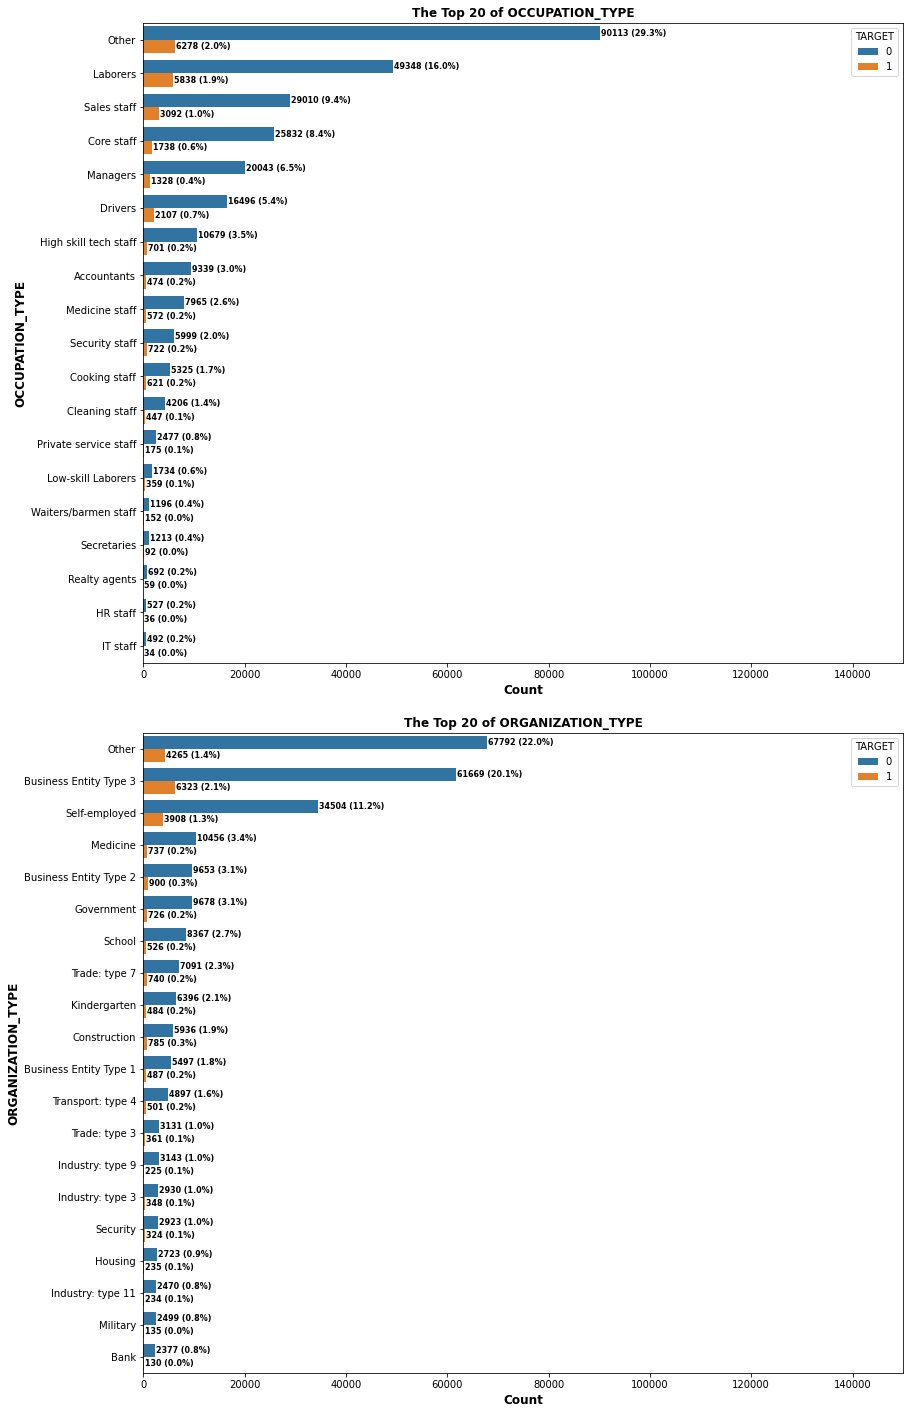

In [87]:
plt.figure(figsize=(13,20))
for i, col in enumerate(cat3):
    plt.subplot(2,1,i+1)
    ax= sns.countplot(y= df_eda[cat3[i]], hue= df_eda['TARGET'], order= df_eda[cat3[i]].value_counts().head(20).index)
    for bars in ax.containers:
        labels = [f'{v.get_width()} ({v.get_width()/df_eda[cat3[i]].count()*100:.1f}%)' for v in bars]
        ax.bar_label(bars, label_type= 'edge', labels= labels, weight='bold', padding=1, fontsize=8)
    ax.set_title(f'The Top 20 of {cat3[i]}', weight='bold', fontsize=12)
    ax.set_ylabel(cat3[i], weight='bold', fontsize=12)
    ax.set_xlabel('Count', weight='bold', fontsize=12)
    ax.set_xlim(0,150000)
    plt.tight_layout(pad=2)

####**- Numerical Column (*Discrete*)**

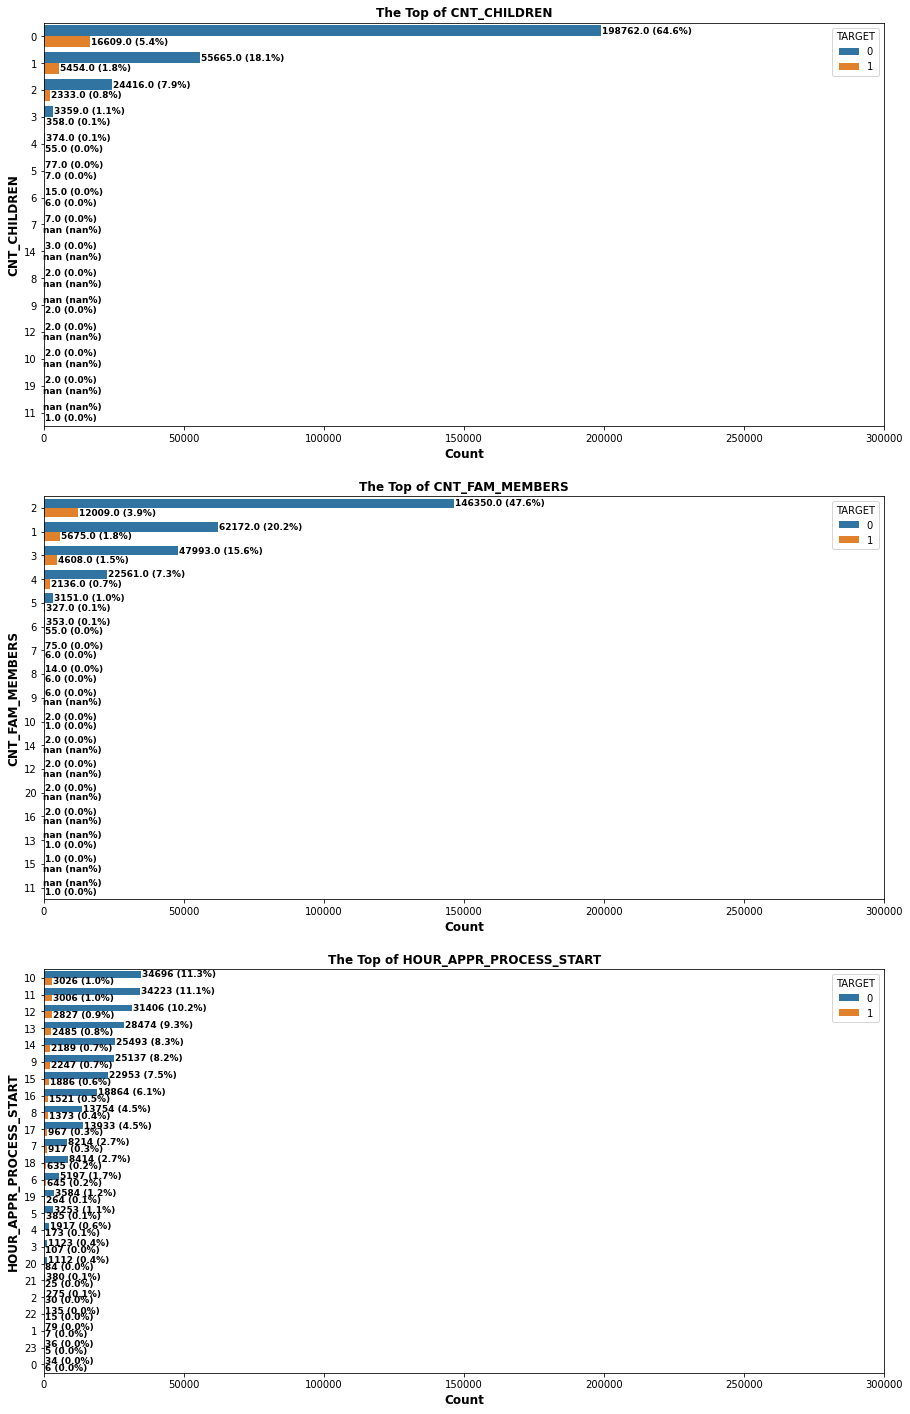

In [58]:
plt.figure(figsize=(13,20))
for i, col in enumerate(cat_discrete):
    plt.subplot(3,1,i+1)
    ax= sns.countplot(y= df_eda[cat_discrete[i]],hue=df_eda['TARGET'], order= df_eda[cat_discrete[i]].value_counts().index)
    for bars in ax.containers:
        labels = [f'{v.get_width()} ({v.get_width()/df_eda[cat_discrete[i]].count()*100:.1f}%)' for v in bars]
        ax.bar_label(bars, label_type= 'edge', labels= labels, weight='bold', padding=1, fontsize=9)
    ax.set_title(f'The Top of {cat_discrete[i]}', weight='bold', fontsize=12)
    ax.set_ylabel(cat_discrete[i], weight='bold', fontsize=12)
    ax.set_xlabel('Count', weight='bold', fontsize=12)
    ax.set_xlim(0,300000)
    plt.tight_layout(pad=2)

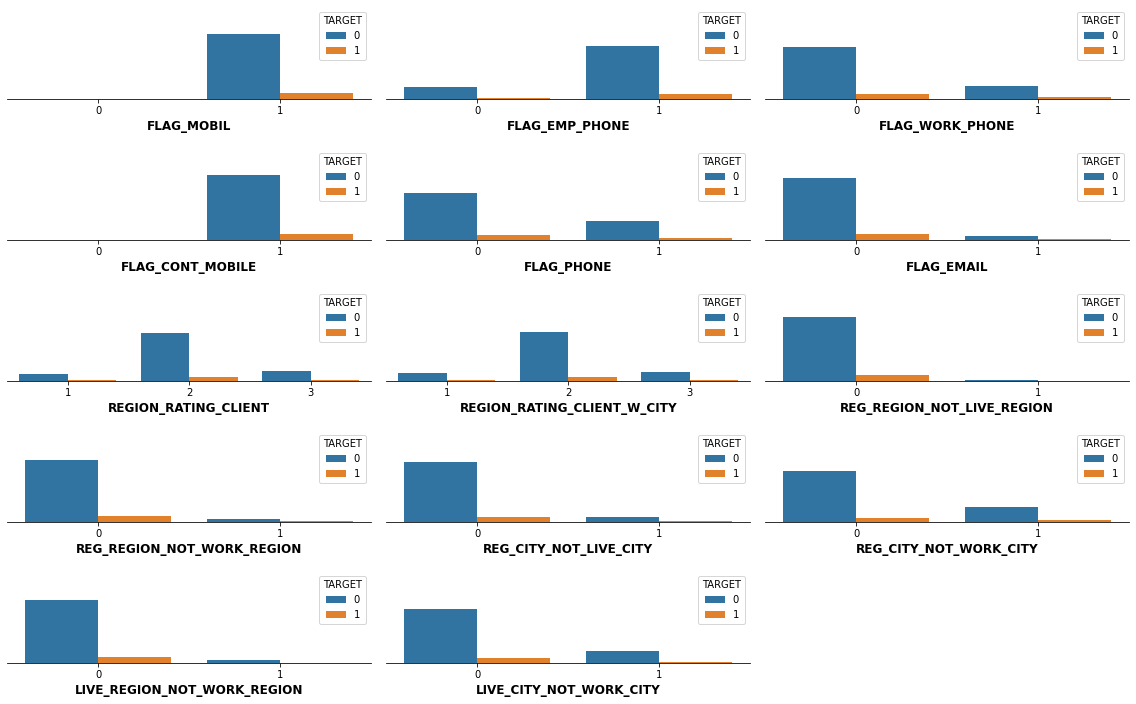

In [88]:
plt.figure(figsize=(16,10))
for i, col in enumerate(binary_discrete):
    plt.subplot(5,3,i+1)
    ax= sns.countplot(x= binary_discrete[i],hue= df_eda['TARGET'], data= df_eda)
    ax.spines[['top','left','right']].set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_yticklabels([])
    ax.set_xlabel(binary_discrete[i], weight='bold', fontsize=12)
    ax.set_ylim(0,400000)
    plt.tight_layout(1.5)

##**5. Feature Engineering**

####**Feature Encoding**

In [37]:
df_select= df_eda.copy()

In [38]:
df_select.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,WEEKDAY_APPR_PROCESS_START,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE_IN_YEARS,TENURE_IN_YEARS,CHANGE_REGISTRATION_IN_YEARS,CHANGE_ID_PUBLISH_IN_YEARS,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVE_CITY_NOT_WORK_CITY,TARGET
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Business Entity Type 3,WEDNESDAY,202500.0,406597.5,24700.5,351000.0,0.018801,25.9,1.7,10.0,5.8,1.0,0,1,10,1,1,0,1,1,0,2,2,0,0,0,0,0,0,1
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,School,MONDAY,270000.0,1293502.5,35698.5,1129500.0,0.003541,45.9,3.3,3.2,0.8,0.0,0,2,11,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,Government,MONDAY,67500.0,135000.0,6750.0,135000.0,0.010032,52.1,0.6,11.7,6.9,0.0,0,1,9,1,1,1,1,1,0,2,2,0,0,0,0,0,0,0
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,Business Entity Type 3,WEDNESDAY,135000.0,312682.5,29686.5,297000.0,0.008019,52.0,8.3,26.9,6.7,1.0,0,2,17,1,1,0,1,0,0,2,2,0,0,0,0,0,0,0
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,Religion,THURSDAY,121500.0,513000.0,21865.5,513000.0,0.028663,54.6,8.3,11.8,9.5,0.0,0,1,11,1,1,0,1,0,0,2,2,0,0,0,1,0,1,0


In [39]:
# list categorical feature non-ordinal
cat_nom = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',
           'NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_FAMILY_STATUS',
           'NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE',
           'WEEKDAY_APPR_PROCESS_START']

# list categorical feature with ordinal value
cat_ord= ['NAME_EDUCATION_TYPE']

# list numerical feature with continuous value 
num_cols= ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
           'REGION_POPULATION_RELATIVE','AGE_IN_YEARS','TENURE_IN_YEARS',
           'CHANGE_REGISTRATION_IN_YEARS','CHANGE_ID_PUBLISH_IN_YEARS',
           'AMT_REQ_CREDIT_BUREAU_YEAR']

In [40]:
encoder = TargetEncoder()
df_select[cat_nom] = encoder.fit_transform(df_select[cat_nom], df_select['TARGET'])

In [41]:
ord_encoder = OrdinalEncoder(categories=[['Lower secondary','Secondary / secondary special',
                                          'Incomplete higher','Higher education','Academic degree']])
df_select[cat_ord] = ord_encoder.fit_transform(df_select.loc[:,['NAME_EDUCATION_TYPE']])

In [42]:
df_select.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,WEEKDAY_APPR_PROCESS_START,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE_IN_YEARS,TENURE_IN_YEARS,CHANGE_REGISTRATION_IN_YEARS,CHANGE_ID_PUBLISH_IN_YEARS,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVE_CITY_NOT_WORK_CITY,TARGET
0,0.090044,0.104406,0.093534,0.086064,0.087787,0.095879,1.0,0.104767,0.083776,0.105771,0.092983,0.086837,202500.0,406597.5,24700.5,351000.0,0.018801,25.9,1.7,10.0,5.8,1.0,0,1,10,1,1,0,1,1,0,2,2,0,0,0,0,0,0,1
1,0.090044,0.075837,0.093534,0.087718,0.079567,0.057550,3.0,0.080456,0.083776,0.063040,0.059148,0.083239,270000.0,1293502.5,35698.5,1129500.0,0.003541,45.9,3.3,3.2,0.8,0.0,0,2,11,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0
2,0.056497,0.104406,0.075007,0.086064,0.087787,0.095879,1.0,0.104767,0.083776,0.105771,0.069781,0.083239,67500.0,135000.0,6750.0,135000.0,0.010032,52.1,0.6,11.7,6.9,0.0,0,1,9,1,1,1,1,1,0,2,2,0,0,0,0,0,0,0
3,0.090044,0.075837,0.093534,0.086064,0.087787,0.095879,1.0,0.104363,0.083776,0.105771,0.092983,0.086837,135000.0,312682.5,29686.5,297000.0,0.008019,52.0,8.3,26.9,6.7,1.0,0,2,17,1,1,0,1,0,0,2,2,0,0,0,0,0,0,0
4,0.090044,0.104406,0.093534,0.086064,0.087787,0.095879,1.0,0.104767,0.083776,0.063040,0.058824,0.087943,121500.0,513000.0,21865.5,513000.0,0.028663,54.6,8.3,11.8,9.5,0.0,0,1,11,1,1,0,1,0,0,2,2,0,0,0,1,0,1,0


####**Check Correlation & Multicollinearity**

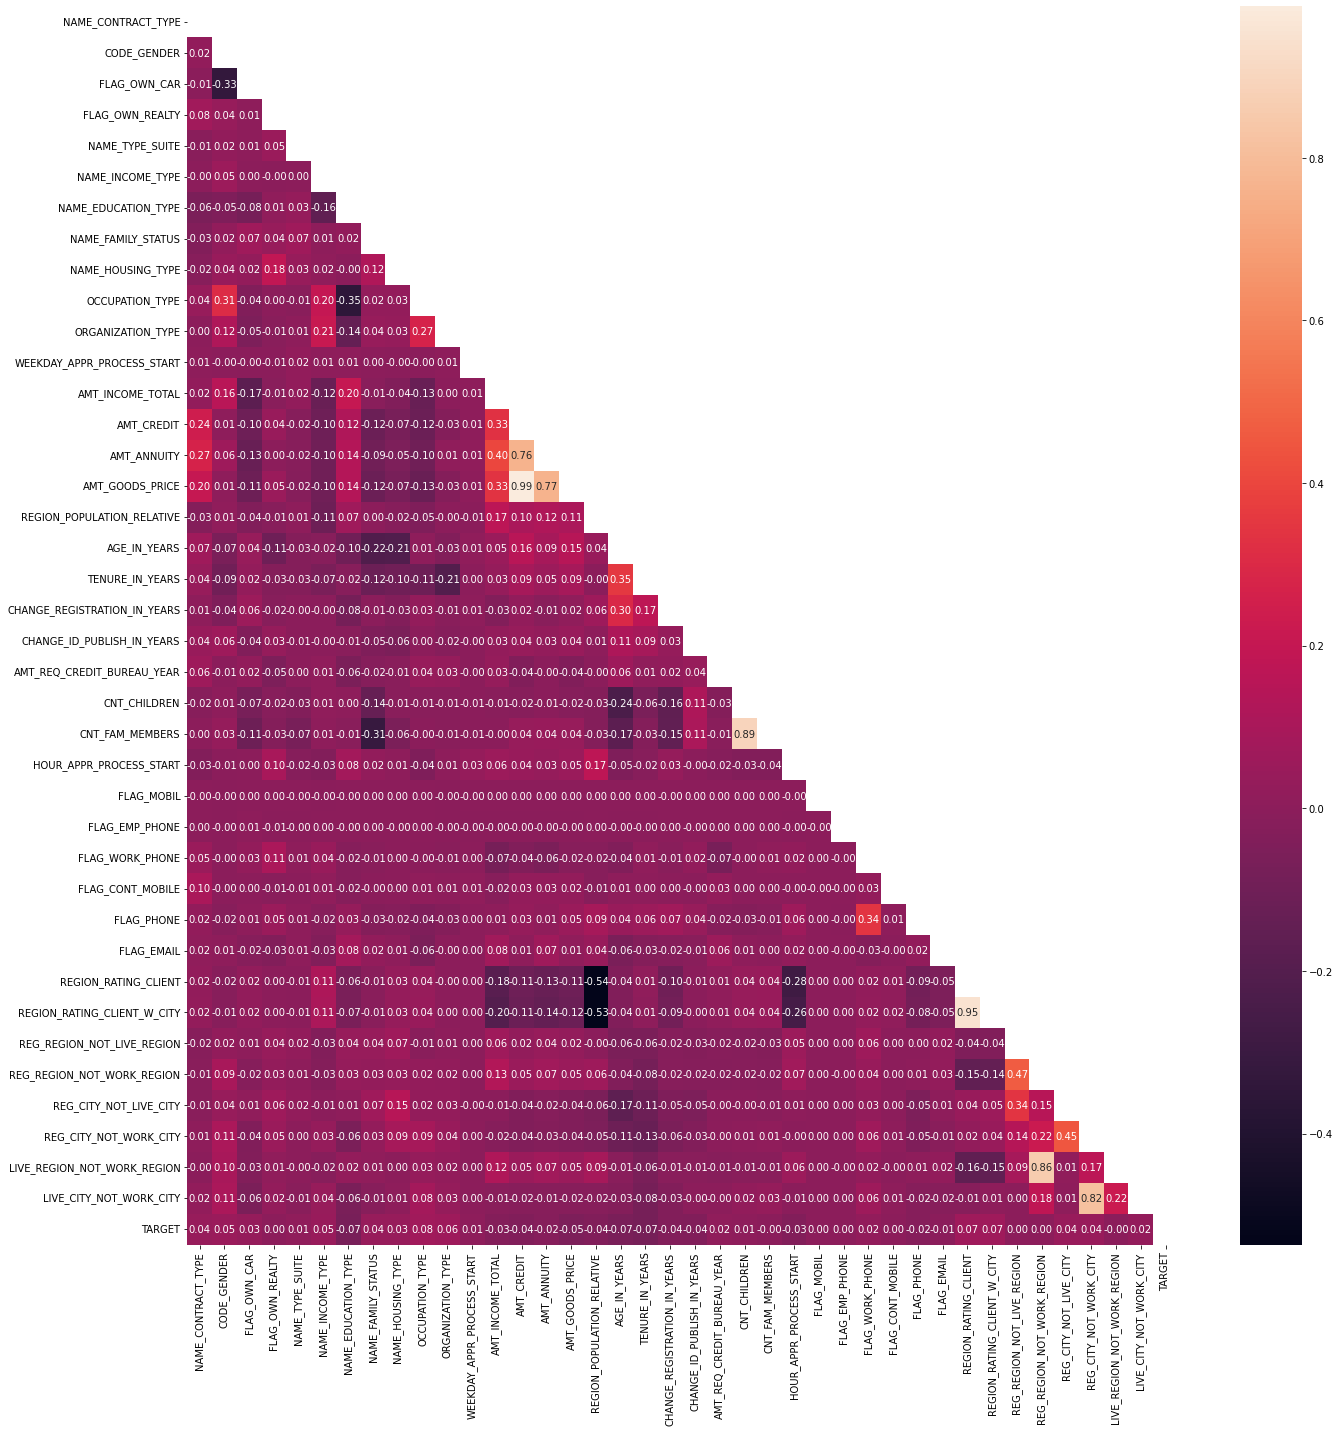

In [43]:
# check correlation all features with heatmap
corr_ = df_select.corr()
# creating mask
mask = np.triu(np.ones_like(df_select.corr())) 
# plotting a triangle correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df_select.corr(), annot=True, fmt='.2f', mask=mask)
plt.tight_layout()

In [100]:
# Check multicolinearity with VIF Score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(df_select)

vif_score = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])],
               index=X.columns).reset_index()
vif_score.columns = ['feature','vif']
vif_score = vif_score.loc[vif_score.feature!='const']
vif_score

,feature,vif
1,NAME_CONTRACT_TYPE,1.207134
2,CODE_GENDER,1.315799
3,FLAG_OWN_CAR,1.181598
4,FLAG_OWN_REALTY,1.090326
5,NAME_TYPE_SUITE,1.016547
6,NAME_INCOME_TYPE,1.108278
7,NAME_EDUCATION_TYPE,1.237135
8,NAME_FAMILY_STATUS,1.338341
9,NAME_HOUSING_TYPE,1.114187
10,OCCUPATION_TYPE,1.373223


> **Observasi:**
> - Pengambilan keputusan:
> - Untuk melihat apakah ada antar fitur yang memiliki korelasi kuat positif yaitu jika **coef correlation > 0.8** dari hasil display heatmap, maka terjadi korelasi kuat positif (sebaliknya jika **coef correlation > -0.8 = berkorelasi kuat negatif**). 
> - Adapun metode lain untuk melihat apakah ada fitur yang mengalami **multicollinearity** yaitu jika **VIF score > 5**, maka terjadi **multicollinearity**.
> - Keputusan untuk memilih fitur/kolom mana saja yang digunakan untuk modeling, maka akan dilakukan seleksi fitur dengan melihat nilai coef correlation dan VIF score antar fitur/kolom. jika **melebihi threshold** yang telah ditentukan sebelumnya, maka fitur/kolom yang melebihi ketentuan threshold akan **didrop** untuk **menghindari multicollinearity** dan mendapatkan **model** dengan **performa yang baik**. 
> - Adapun setelah melihat coef correlation pada masing-masing kolom, didapatkan beberapa kolom yang berkorelasi kuat positif, diantaranya:
>   - `'AMT_CREDIT'` & `'AMT_GOODS_PRICE'` = 0.99 (korelasi sangat kuat positif/mendekati 1)
>   - `'REGION_RATING_CLIENT'` & `'REG_RATING_CLIENT_W_CITY'` = 0.95 (korelasi sangat kuat positif/mendekati 1)
>   - `'REG_REGION_NOT_WORK_REGION'` & `'LIVE_REGION_NOT_WORK_REGION'` = 0.86 (korelasi kuat positif)
>   - `'REG_CITY_NOT_WORK_CITY'` & `'LIVE_CITY_NOT_WORK_CITY'` = 0.83 (korelasi kuat positif)
> - Adapun setelah melihat VIF score pada masing-masing kolom, didapatkan beberapa kolom mengalami multicollinearity, diantaranya:
>   - `'AMT_CREDIT'`= 40.68 
>   - `'AMT_GOODS_PRICE'`= 41.45
>   - `'REGION_RATING_CLIENT`= 10.70
>   - `'REGION_RATING_CLIENT_W_CITY'`= 10.57


In [44]:
# drop redundant features & multicollinearity
df_select = df_select.drop(['AMT_GOODS_PRICE','REGION_RATING_CLIENT',
                            'CNT_FAM_MEMBERS','LIVE_CITY_NOT_WORK_CITY',
                            'LIVE_REGION_NOT_WORK_REGION'],axis=1)

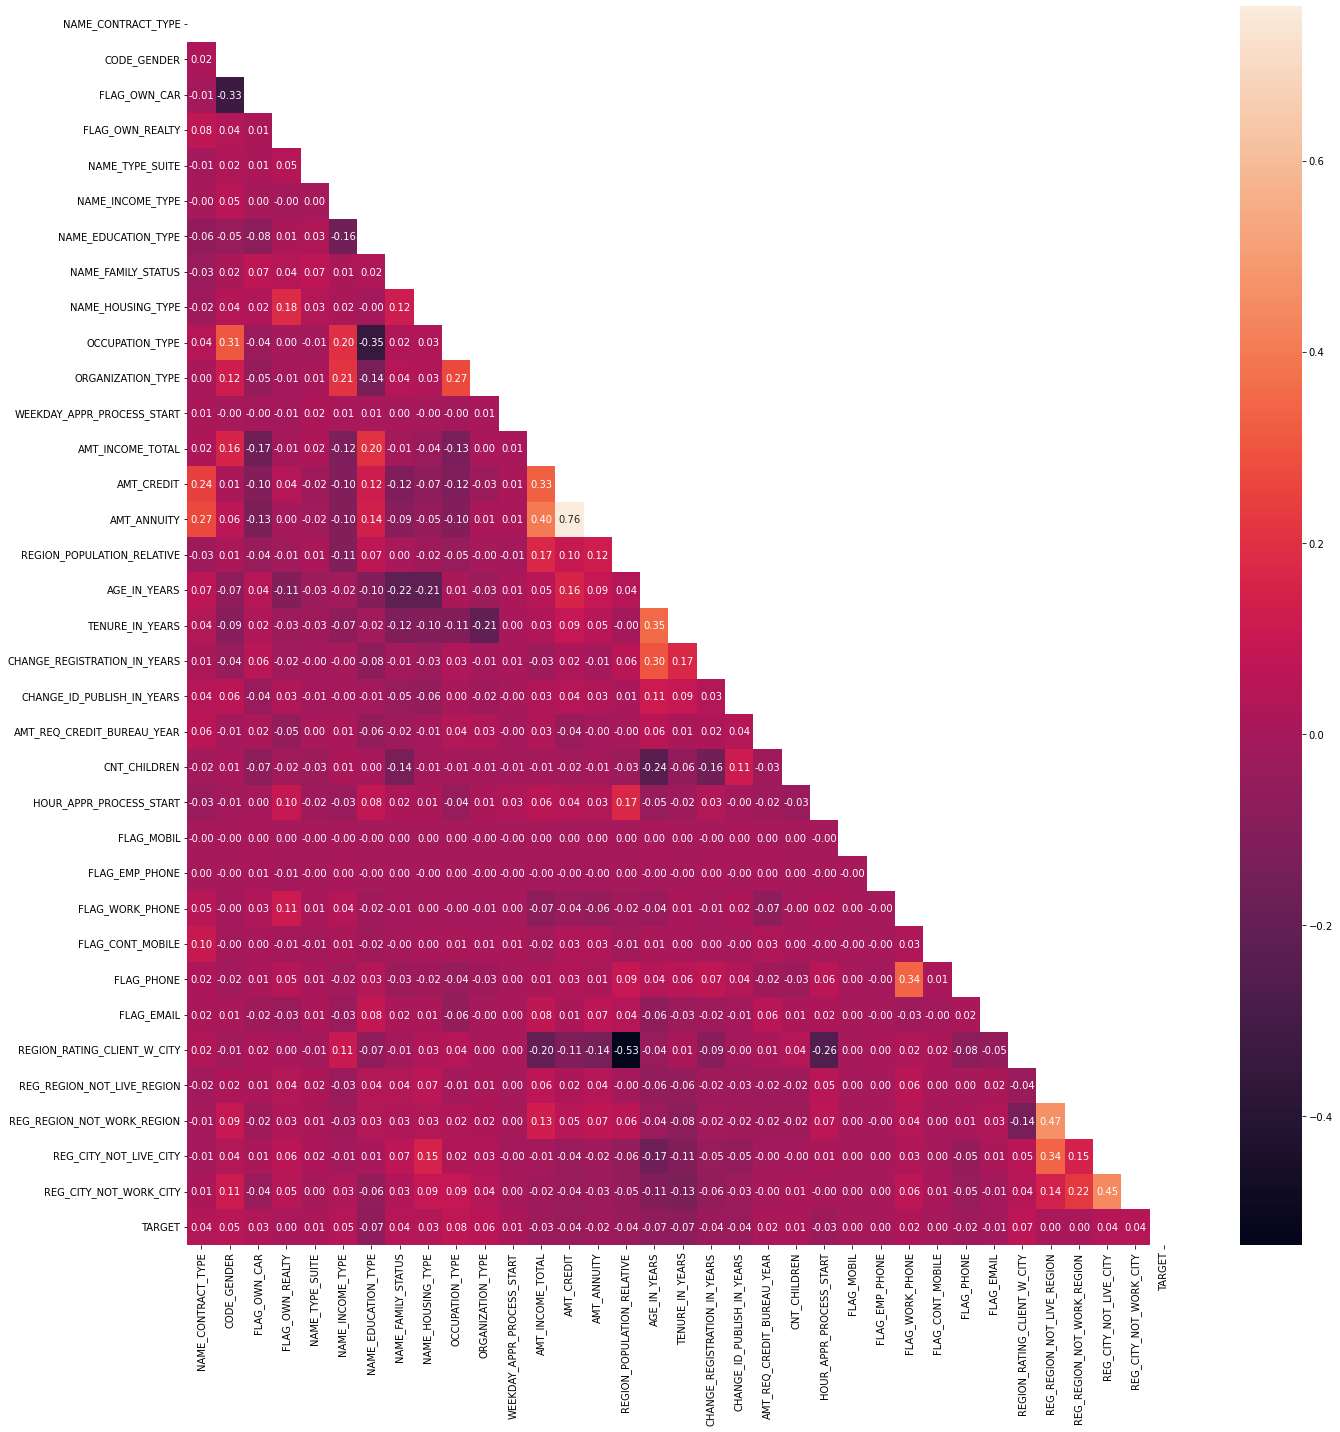

In [45]:
# check correlation all features with heatmap
corr_ = df_select.corr()
# creating mask
mask = np.triu(np.ones_like(df_select.corr())) 
# plotting a triangle correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df_select.corr(), annot=True, fmt='.2f', mask=mask)
plt.tight_layout()

In [46]:
# Check multicolinearity with VIF Score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(df_select)

vif_score = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])],
               index=X.columns).reset_index()
vif_score.columns = ['feature','vif']
vif_score = vif_score.loc[vif_score.feature!='const']
vif_score

,feature,vif
1,NAME_CONTRACT_TYPE,1.137645
2,CODE_GENDER,1.312802
3,FLAG_OWN_CAR,1.175149
4,FLAG_OWN_REALTY,1.087605
5,NAME_TYPE_SUITE,1.012286
6,NAME_INCOME_TYPE,1.105551
7,NAME_EDUCATION_TYPE,1.233157
8,NAME_FAMILY_STATUS,1.122096
9,NAME_HOUSING_TYPE,1.107696
10,OCCUPATION_TYPE,1.372073


####**Duplicated Dataset for Modeling**

In [47]:
df_mod = df_select.copy()

In [48]:
df_mod.duplicated().sum()

6

In [49]:
df_mod = df_mod.drop_duplicates()

In [50]:
df_mod.duplicated().sum()

0

####**Handling Imbalanced Dataset**

In [52]:
from imblearn.over_sampling import SMOTE

#transform the dataset
oversample= SMOTE(random_state=42)

X = df_mod.drop(columns='TARGET').to_numpy()
y = df_mod['TARGET'].to_numpy()
y = y.reshape(len(y),) # sklearn's shape requirement
X_os, y_os = oversample.fit_resample(X, y)

####**Split Dataset (Train & Test Set)**

In [53]:
# split dataset
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, 
                                                    test_size = 0.20, 
                                                    random_state = 42)

In [54]:
for x in [X_train, X_test, y_train, y_test]:
    print(x.shape)

(368475, 34)
(92119, 34)
(368475,)
(92119,)


####**Feature Scaling**

In [55]:
# scaling the features
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X = scaler.fit_transform(X)

##**6.Machine Learning Modelling**

####**Benchmark Model**

#####**1) Logistic Regression**

In [56]:
#define model Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [89]:
# prepare prediction result on test data
y_test_pred_logreg = logreg.predict(X_test)

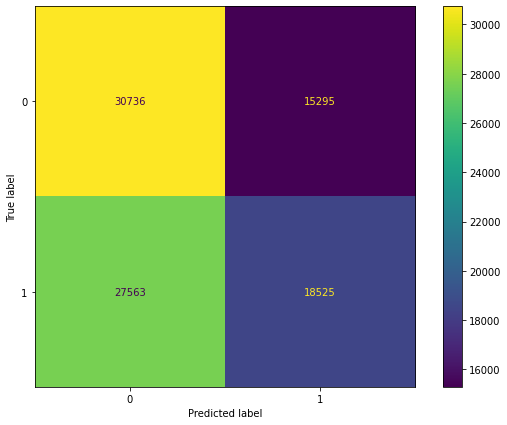

In [98]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(y_test, y_test_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

In [99]:
# classification test data report
from sklearn.metrics import classification_report
y_test_pred_logreg = logreg.predict(X_test)
print(classification_report(y_test, y_test_pred_logreg))

              precision    recall  f1-score   support

           0       0.53      0.67      0.59     46031
           1       0.55      0.40      0.46     46088

    accuracy                           0.53     92119
   macro avg       0.54      0.53      0.53     92119
weighted avg       0.54      0.53      0.53     92119



#####**2) K-NN Classifier**

In [92]:
#define model knn
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [93]:
# prepare prediction result on test data
y_test_pred_knn = knn_clf.predict(X_test)

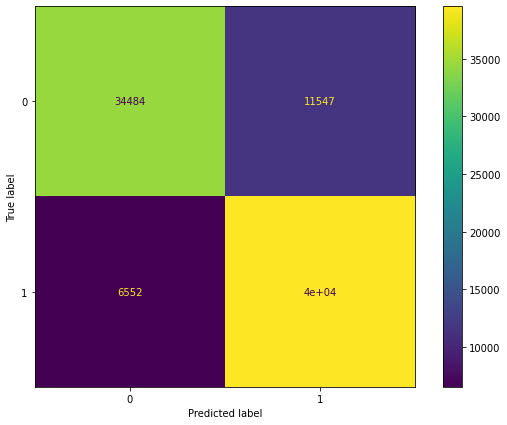

In [100]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(y_test, y_test_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

In [102]:
# classification test data report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79     46031
           1       0.77      0.86      0.81     46088

    accuracy                           0.80     92119
   macro avg       0.81      0.80      0.80     92119
weighted avg       0.81      0.80      0.80     92119



#####**3) Decision Tree Classifier**

In [60]:
#define model decision tree
dct_clf = DecisionTreeClassifier()
dct_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [94]:
# prepare prediction result on test data
y_test_pred_dct = dct_clf.predict(X_test)

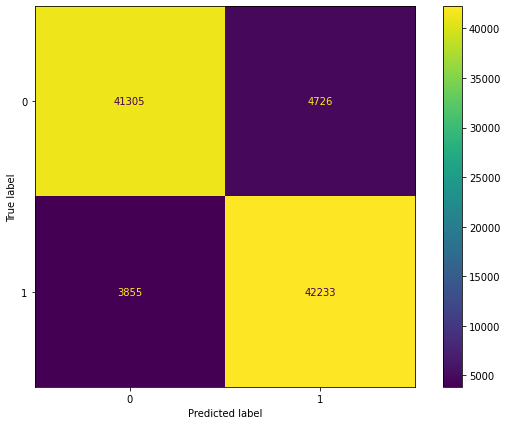

In [103]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(y_test, y_test_pred_dct)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

In [104]:
# classification test data report
from sklearn.metrics import classification_report
y_test_pred_dct = dct_clf.predict(X_test)
print(classification_report(y_test, y_test_pred_dct))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     46031
           1       0.90      0.92      0.91     46088

    accuracy                           0.91     92119
   macro avg       0.91      0.91      0.91     92119
weighted avg       0.91      0.91      0.91     92119



#####**4) Random Forest**

In [58]:
#define model randomforest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [72]:
# prepare prediction result on test data
y_test_pred_rf = rf_clf.predict(X_test)

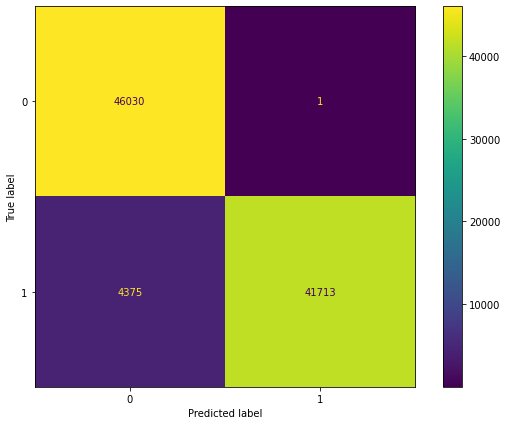

In [83]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(y_test, y_test_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

In [84]:
# classification test data report
from sklearn.metrics import classification_report
y_test_pred_rf = rf_clf.predict(X_test)
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     46031
           1       1.00      0.91      0.95     46088

    accuracy                           0.95     92119
   macro avg       0.96      0.95      0.95     92119
weighted avg       0.96      0.95      0.95     92119



#####**5) XGBoost Classifier**

In [95]:
#define model xgboost
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

XGBClassifier(random_state=42)

In [96]:
# prepare prediction result on test data
y_test_pred_xgb = xgb_clf.predict(X_test)

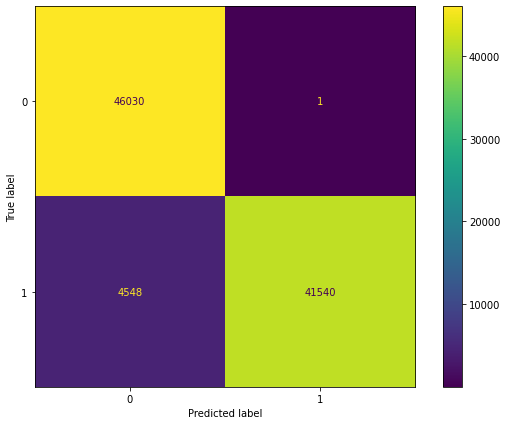

In [105]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(y_test, y_test_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

In [106]:
# classification test data report
from sklearn.metrics import classification_report
y_test_pred_xgb = xgb_clf.predict(X_test)
print(classification_report(y_test, y_test_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     46031
           1       1.00      0.90      0.95     46088

    accuracy                           0.95     92119
   macro avg       0.96      0.95      0.95     92119
weighted avg       0.96      0.95      0.95     92119



###**ROC_AUC CURVE**

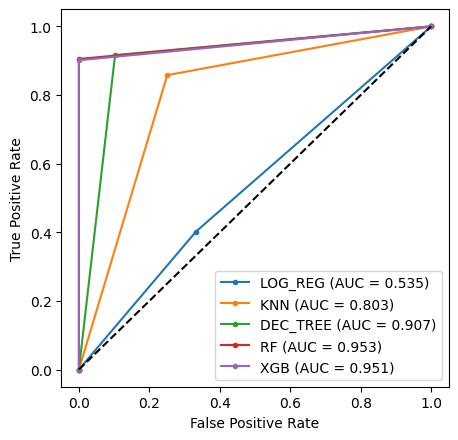

In [149]:
from sklearn.metrics import roc_curve, auc


lr_fpr, lr_tpr, threshold = roc_curve(y_test, y_test_pred_logreg)
auc_lr = auc(lr_fpr, lr_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_test_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

dct_fpr, dct_tpr, threshold = roc_curve(y_test, y_test_pred_dct)
auc_dct = auc(dct_fpr, dct_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_test_pred_rf)
auc_rf = auc(rf_fpr, rf_tpr)

xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_test_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(lr_fpr, lr_tpr, marker='.', label='LOG_REG (AUC = %0.3f)' % auc_lr)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUC = %0.3f)' % auc_knn)
plt.plot(dct_fpr, dct_tpr, marker='.', label='DEC_TREE (AUC = %0.3f)' % auc_dct)
plt.plot(rf_fpr, rf_tpr, marker='.', label='RF (AUC = %0.3f)' % auc_rf)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGB (AUC = %0.3f)' % auc_xgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


###**Hyperparameter Tuning For Improve Models**

####**1) Random Forest Tuning**

In [120]:
parameters = {
    'n_estimators': range(10, 101, 10),
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 6),
    'max_features': ['auto', 'sqrt']
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, n_iter=5, n_jobs= -1)
rf_clf_randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': range(1, 11),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': range(1, 6),
                                        'min_samples_split': range(2, 11),
                                        'n_estimators': range(10, 101, 10)})

In [121]:
# check the best parameters
best_params = rf_clf_randomcv.best_params_
print(f'Best Parameters is {best_params}')

Best Parameters is {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10}


In [123]:
# define best model random forest after tuning
best_model_rf = rf_clf_randomcv.best_estimator_
best_model_rf


RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=4,
                       random_state=42)

In [124]:
# prepare prediction result on test data
y_pred_cv_rf = best_model_rf.predict(X_test)

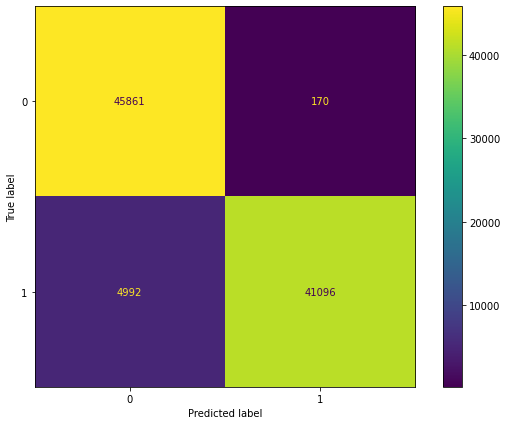

In [125]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(y_test, y_pred_cv_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

In [126]:
# classification test data report
from sklearn.metrics import classification_report
y_pred_cv_rf = best_model_rf.predict(X_test)
print(classification_report(y_test, y_pred_cv_rf))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     46031
           1       1.00      0.89      0.94     46088

    accuracy                           0.94     92119
   macro avg       0.95      0.94      0.94     92119
weighted avg       0.95      0.94      0.94     92119



####**2) XGBoost Tuning**

In [136]:
parameters = {
    'n_estimators': np.arange(10, 110, 10),
    'max_depth': np.arange(3, 11),
    'learning_rate': np.arange(0.01, 0.3),
    'min_child_weight': np.arange(1, 11),
    'gamma': np.arange(0,0.5),
    'colsample_bytree': np.arange(0.5, 1)
}

xgb_clf_randomcv = RandomizedSearchCV(xgb_clf, parameters, cv=5, n_iter=10, n_jobs= -1)
xgb_clf_randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=XGBClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5]),
                                        'gamma': array([0.]),
                                        'learning_rate': array([0.01]),
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_child_weight': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])})

In [137]:
# check the best parameters
best_params = xgb_clf_randomcv.best_params_
print(f'Best Parameters is {best_params}')

Best Parameters is {'n_estimators': 50, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.0, 'colsample_bytree': 0.5}


In [138]:
# define best model random forest after tuning
best_model_xgb = xgb_clf_randomcv.best_estimator_
best_model_xgb

XGBClassifier(colsample_bytree=0.5, gamma=0.0, learning_rate=0.01, max_depth=10,
              min_child_weight=5, n_estimators=50, random_state=42)

In [139]:
# prepare prediction result on test data
y_pred_cv_xgb = best_model_xgb.predict(X_test)

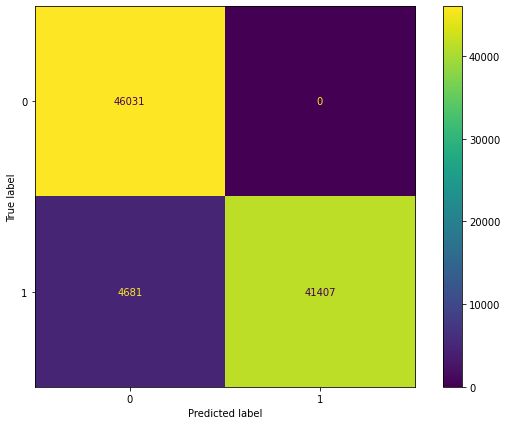

In [140]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(y_test, y_pred_cv_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

In [141]:
# classification test data report
from sklearn.metrics import classification_report
y_pred_cv_xgb = best_model_xgb.predict(X_test)
print(classification_report(y_test, y_pred_cv_xgb))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     46031
           1       1.00      0.90      0.95     46088

    accuracy                           0.95     92119
   macro avg       0.95      0.95      0.95     92119
weighted avg       0.95      0.95      0.95     92119



####**ROC_AUC AFTER TUNING**

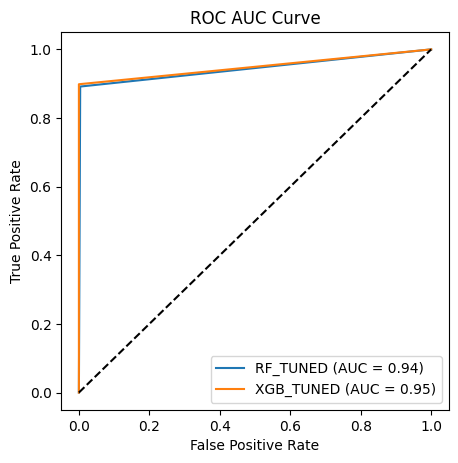

In [146]:
from sklearn.metrics import roc_curve, auc

# Menghitung nilai false positive rate (fpr) dan true positive rate (tpr)
rf_cv_fpr, rf_cv_tpr, thresholds = roc_curve(y_test, y_pred_cv_rf)
auc_rf_cv = auc(rf_cv_fpr, rf_cv_tpr)

xgb_cv_fpr, xgb_cv_tpr, thresholds = roc_curve(y_test, y_pred_cv_xgb)
auc_xgb_cv = auc(xgb_cv_fpr, xgb_cv_tpr)

# Membuat plot ROC AUC curve
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rf_cv_fpr, rf_cv_tpr, label='RF_TUNED (AUC = %0.2f)' % auc_rf_cv)
plt.plot(xgb_cv_fpr, xgb_cv_tpr, label='XGB_TUNED (AUC = %0.2f)' % auc_xgb_cv)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()


####**Models ML Comparison**

In [3]:
results = pd.DataFrame([["Logistic Regression (LogReg)", 0.53, 0.53, 0.55, 0.40, 0.46],["K-Nearest Neighbors (KNN)", 0.80, 0.80, 0.77, 0.86,0.81],
                       ["Decision Tree", 0.90, 0.91, 0.90, 0.92, 0.91],["Random Forest", 0.95, 0.95, 1.0, 0.91, 0.95],
                       ["XGBoost", 0.95, 0.95, 1.0, 0.90, 0.95], ["Random Forest Tuned", 0.94, 0.94, 1.0, 0.89, 0.94],
                       ["XGBoost Tuned", 0.95, 0.95, 1.0, 0.90, 0.95]],
                        columns = ["Models","ROC-AUC" ,"Accuracy", "Precision", "Recall", "f1-Score"])

results.sort_values('ROC-AUC', ascending=False).style.background_gradient(cmap='Blues')

,Models,ROC-AUC,Accuracy,Precision,Recall,f1-Score
3,Random Forest,0.950000,0.950000,1.000000,0.910000,0.950000
4,XGBoost,0.950000,0.950000,1.000000,0.900000,0.950000
6,XGBoost Tuned,0.950000,0.950000,1.000000,0.900000,0.950000
5,Random Forest Tuned,0.940000,0.940000,1.000000,0.890000,0.940000
2,Decision Tree,0.900000,0.910000,0.900000,0.920000,0.910000
1,K-Nearest Neighbors (KNN),0.800000,0.800000,0.770000,0.860000,0.810000
0,Logistic Regression (LogReg),0.530000,0.530000,0.550000,0.400000,0.460000


####**Feature Importance**

In [154]:
#Check feature important from Random Forest Model
data_feature = df_mod.drop('TARGET',axis=1)
feature_name_list=data_feature.columns
rf_clf.feature_names = feature_name_list
rf_df= pd.DataFrame({'feature': rf_clf.feature_names,'importance':rf_clf.feature_importances_})
rf_df

,feature,importance
0,NAME_CONTRACT_TYPE,0.001466
1,CODE_GENDER,0.102472
2,FLAG_OWN_CAR,0.081003
3,FLAG_OWN_REALTY,0.044547
4,NAME_TYPE_SUITE,0.012591
5,NAME_INCOME_TYPE,0.045939
6,NAME_EDUCATION_TYPE,0.070807
7,NAME_FAMILY_STATUS,0.053207
8,NAME_HOUSING_TYPE,0.010712
9,OCCUPATION_TYPE,0.042381


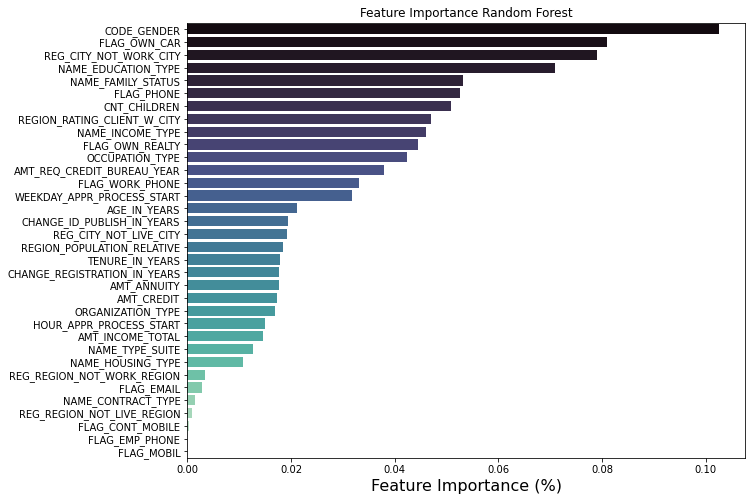

In [157]:
plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='feature', data=rf_df.sort_values('importance', ascending=False), palette='mako')
plt.xticks(rotation=90);
plt.title('Feature Importance Random Forest')
plt.xlabel('Feature Importance (%)', fontsize=16)
plt.xticks(rotation=0)
plt.ylabel('')
plt.show()

In [158]:
xgb_clf.feature_names = feature_name_list
feat_df= pd.DataFrame({'feature': xgb_clf.feature_names,'importance':xgb_clf.feature_importances_})

In [159]:
sorted_df=feat_df.sort_values('importance', ascending=False)

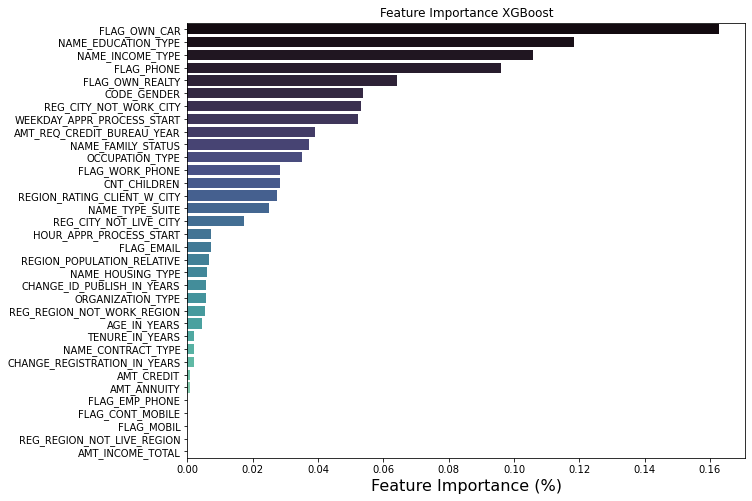

In [160]:
#Check feature important from XGBoost
plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='feature', data=sorted_df, palette='mako')
plt.title('Feature Importance XGBoost')
plt.xlabel('Feature Importance (%)',fontsize=16)
plt.ylabel('')
plt.show()

#**7. Deployment**

In [151]:
import pickle

In [153]:
pickle.dump(best_model_xgb,open('XGBoost_Tuned.pkl','wb'))

#**8.Recommendation**

**For Business Improvement**:
> - Penting bagi tim analis dan tim keuangan untuk melakukan efisiensi credit agar defaulted tidak akan sering terjadi yang dapat merugikan pihak kreditur. 
> - menggunakan bantuan machine learning dengan roc_auc sebesar 95% dan kesalahan/error sebesar 5% maka berikut ini perhitungan efisiensinya:
  - misal asumsikan:
  - total dana kreditur: 100.000.000
  - credit terbayar: 100.000.000 x 95% = 95.000.000 (hanya angsuran, belum +bunga (jika ada))
  - credit tak terbayar: 100.000.000 x 5% = 5.000.000 (kerugian akibat ML gagal menentukan debitur gagal bayar)
> - Rentang usia lebih muda 18-30 tahun cenderung kesulitan dalam melakukan pembayaran kredit. Sedangkan usia 35-45 adalah klien yang tidak memiliki kesulitan pembayaran kredit, sehingga dapat prioritas untuk diberi pinjaman.
> - Jenjang pendidikan klien dan jenis pendapatannya perlu disoroti lebih lanjut, karena banyak klien yang memiliki kecenderungan kesulitan membayar berasal dari tingkat pendidikan secondary, dan masih mendapatkan income dari bekerja.


**For Machine Learning Improvement**:
> - Hasil machine learning yang memiliki performa baik yaitu XGBoost Classifier dan Random Forest Classifier. Baik berdasarkan score ROC-AUC maupun dari accuracy.
> - Setelah dilakukan Hyperparameter Tuning, tidak terlalu terjadi perubahan yang signifikan pada performa ML
> - Dapat menggunakan Pipeline untuk memudahkan dan mempercepat proses feature engineering dan deployment kedepannya.  
